In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
#Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ls

50_Startups.csv   delivery_time.csv      Movie.csv
bank-full1.csv    diabetes.csv           mywt.kmw.data-00000-of-00001
bank-full.csv     EastWestAirlines.xlsx  mywt.kmw.index
BEML.csv          Elon_musk.csv          NLP-food-review.csv
Cars.csv          Elon_musk_p_n.csv      pima-indians-diabetes.csv
checkpoint        fig.jpg                Salary_Data.csv
claimants.csv     Fraud_check.csv        Titanic.csv
Company_Data.csv  GLAXO.csv              ToyotaCorolla.csv
crime_data.csv    iris.csv               wc-at.csv


In [ ]:
crime=pd.read_csv("crime_data.csv")

In [ ]:
crime.head(50)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
crime.shape

(50, 5)

In [ ]:
x=crime.iloc[:,1:5]

#**KMEANS CLustering**

In [ ]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.metrics import silhouette_score

In [ ]:
scaler=MinMaxScaler()
scaled_fearures=scaler.fit_transform(x)

In [ ]:
crime.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [ ]:
model=KMeans(n_clusters=3)
label=model.fit_predict(scaled_fearures)
'''for i in range(len(label)):
  print(crime["Unnamed: 0"][i],label[i])'''

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


'for i in range(len(label)):\n  print(crime["Unnamed: 0"][i],label[i])'

In [ ]:

d={'state':crime['Unnamed: 0'],'murder':crime['Murder'],'Assault':crime['Assault'],'UrbanPop':crime['UrbanPop'],'Rape':crime['Rape'],'cluster':label}
df=pd.DataFrame(data=d).sort_values(by='cluster')
df

,state,murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
21,Michigan,12.1,255,74,35.1,0
41,Tennessee,13.2,188,59,26.9,0
19,Maryland,11.3,300,67,27.8,0
17,Louisiana,15.4,249,66,22.2,0
27,Nevada,12.2,252,81,46.0,0
42,Texas,12.7,201,80,25.5,0
12,Illinois,10.4,249,83,24.0,0
31,New York,11.1,254,86,26.1,0
30,New Mexico,11.4,285,70,32.1,0


In [ ]:
#INFERENCE OF KMEANS
len=3
l=[]
k=[]
for i in range(len):
  l.append(i)
  k.append(list(label).count(i))
df1={'cluster':l,'states_count':k}
df2=pd.DataFrame(data=df1)
df2

,cluster,states_count
0,0,19
1,1,13
2,2,18


In [ ]:
l=[]
for i in range(2,10):
  l.append(silhouette_score(scaled_fearures,KMeans(n_clusters=i).fit_predict(scaled_fearures)))
l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[0.42364457559625074,
 0.3187755079997931,
 0.33968228051517263,
 0.3014255743602067,
 0.2806734125823691,
 0.29442150097519293,
 0.25715136923757864,
 0.2503547717467335]

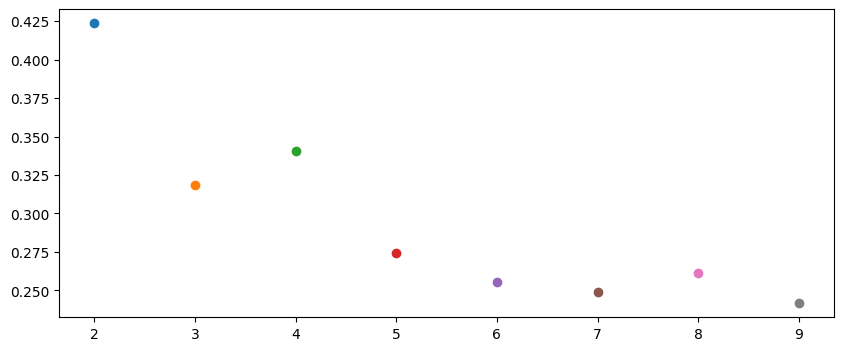

In [ ]:
plt.figure(figsize=(10,4))
for i in range(2,10):
  plt.scatter(i,l[i-2])
  plt.plot(i,l[i-2])
plt.show()


In [ ]:
m=[]
for i in range(2,10):
  model=KMeans(n_clusters=i)
  model.fit(scaled_fearures)
  m.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

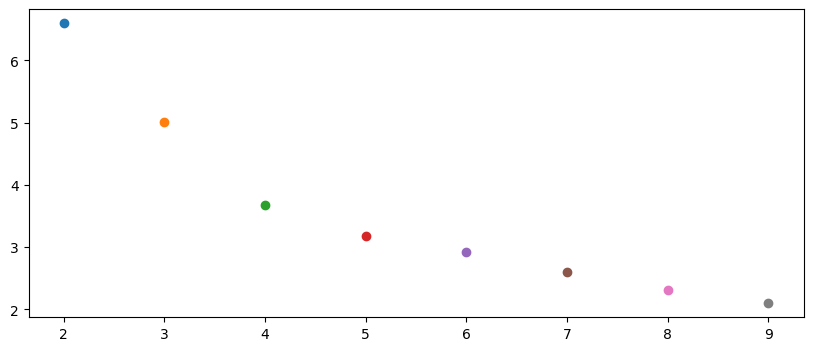

In [ ]:
plt.figure(figsize=(10,4))
for i in range(2,10):
  plt.scatter(i,m[i-2])
plt.show()
#4 seems to be the best k for this model

[0 1 2]


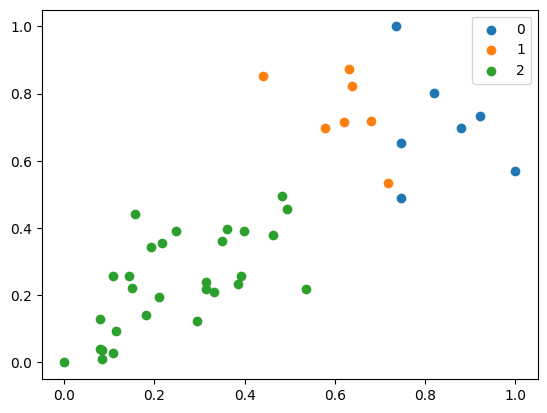

In [ ]:
#filtered_label0 = scaled_fearures[label == 0]
#filtered_label1 = scaled_fearures[label == 1]
#filtered_label2 = scaled_fearures[label == 2]
#filtered_label3 = scaled_fearures[label == 3]

#plotting the results
#label1=set(label)
print(label1)
for i in range(3):
  plt.scatter(scaled_fearures[label == i , 0] , scaled_fearures[label == i , 1] , label = i)
plt.legend()
plt.show()

#plt.scatter(filtered_label0[:,0] , filtered_label0[:,1],color="red")
#plt.scatter(filtered_label1[:,0] , filtered_label1[:,1],color="blue")
#plt.scatter(filtered_label2[:,0] , filtered_label2[:,1],color="green")
#plt.scatter(filtered_label3[:,0] , filtered_label3[:,1],color="orange")
#plt.show()

[link text](https://)#**Hierarchial Clustering**

In [ ]:
model2=AgglomerativeClustering(n_clusters=3,affinity="l2",linkage="complete")
label=model2.fit_predict(scaled_fearures)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
l=[]
for i in range(2,10):
  l.append(silhouette_score(scaled_fearures,AgglomerativeClustering(n_clusters=i,affinity="l2",linkage="complete").fit_predict(scaled_fearures)))
l

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

[0.42364457559625074,
 0.30877213909512063,
 0.3060729442426308,
 0.3056360903608855,
 0.2728435659779423,
 0.27387642168206544,
 0.24780604916967508,
 0.2400551166172384]

In [ ]:
#3 clusters seems appropriate for this

In [ ]:
label

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1])

[0 1 2]
<class 'numpy.ndarray'>


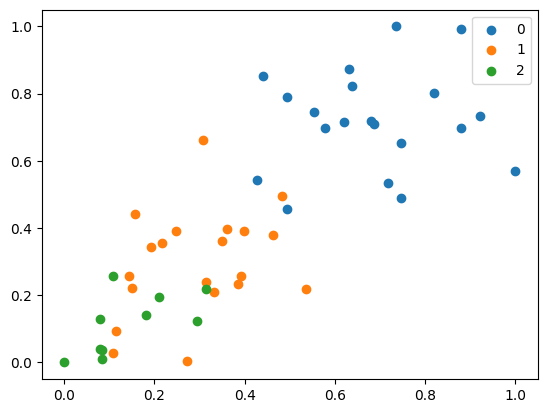

In [ ]:
label1=np.unique(label)
print(label1)
label3=list(label1)
print(type(label1))
for i in range(3):
  plt.scatter(scaled_fearures[label == i , 0] , scaled_fearures[label == i , 1] , label = i)
plt.legend()
plt.show()


In [ ]:
d={'state':crime['Unnamed: 0'],'murder':crime['Murder'],'Assault':crime['Assault'],'UrbanPop':crime['UrbanPop'],'Rape':crime['Rape'],'cluster':label}
df=pd.DataFrame(data=d).sort_values(by='cluster')
df

,state,murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
42,Texas,12.7,201,80,25.5,0
41,Tennessee,13.2,188,59,26.9,0
39,South Carolina,14.4,279,48,22.5,0
32,North Carolina,13.0,337,45,16.1,0
31,New York,11.1,254,86,26.1,0
30,New Mexico,11.4,285,70,32.1,0
27,Nevada,12.2,252,81,46.0,0
23,Mississippi,16.1,259,44,17.1,0
21,Michigan,12.1,255,74,35.1,0


In [ ]:
#INFERENCE OF Hierarchial Clustering
len=3
l=[]
k=[]
for i in range(len):
  l.append(i)
  k.append(list(label).count(i))
df1={'cluster':l,'states_count':k}
df2=pd.DataFrame(data=df1)
df2

,cluster,states_count
0,0,20
1,1,20
2,2,10


#**DBSCAN**

In [ ]:
model3=DBSCAN(metric='euclidean',min_samples=3,eps=0.28)
label=model3.fit_predict(scaled_fearures)
label

array([ 0, -1,  1,  2, -1, -1,  2, -1, -1,  0, -1,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2,  0,  2,  2,  2, -1,  2,  2,  1,  1,  0,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  1,  2,  2,  2,  2,  2,  2,  2])

In [ ]:
list(label).count(2)

29

In [ ]:
scaled_fearures

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
#to check appropriate vale of epsilon
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(scaled_fearures)
distances, indices = neighbors_fit.kneighbors(scaled_fearures)

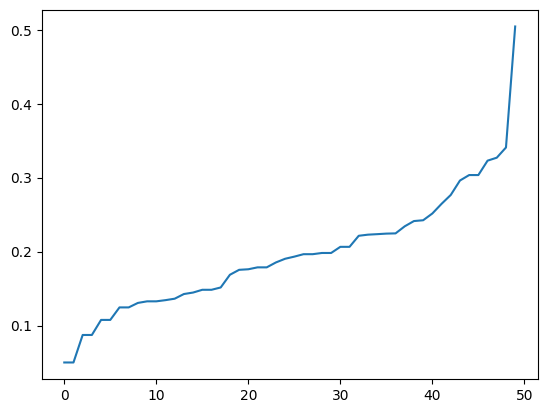

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

[0 1 2]


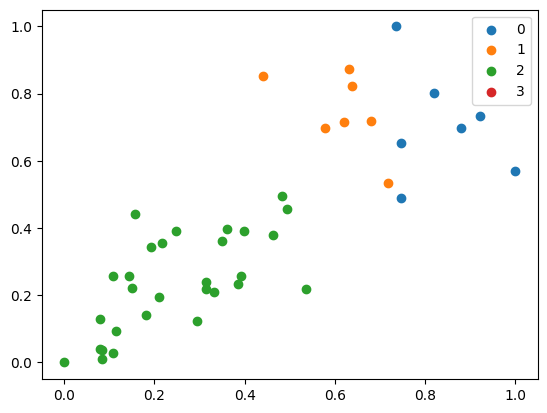

In [ ]:
#label1=set(label)
print(label1)
for i in range(4):
  plt.scatter(scaled_fearures[label == i , 0] , scaled_fearures[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
d={'state':crime['Unnamed: 0'],'murder':crime['Murder'],'Assault':crime['Assault'],'UrbanPop':crime['UrbanPop'],'Rape':crime['Rape'],'cluster':label}
df=pd.DataFrame(data=d).sort_values(by='cluster')
df

,state,murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,-1
27,Nevada,12.2,252,81,46.0,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
10,Hawaii,5.3,46,83,20.2,-1
0,Alabama,13.2,236,58,21.2,0
23,Mississippi,16.1,259,44,17.1,0
39,South Carolina,14.4,279,48,22.5,0


In [ ]:
#INFERENCE OF DBSCAN
len=3
l=[]
k=[]
for i in range(len):
  l.append(i)
  k.append(list(label).count(i))
df1={'cluster':l,'states_count':k}
df2=pd.DataFrame(data=df1)
df2

,cluster,states_count
0,0,7
1,1,7
2,2,29
